In [2]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.signal
from scipy.stats import chi2
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
voltaje = []
tiempo = []

for i in range(1,6):

    path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 3-9/cobre/0.8/{i}.csv"
    df= pd.read_csv(path, header=None, skiprows= 1)
    t = df[0]
    v = df[2]

    inicio = []

    for n in range(len(v)-1):
        if v[n] >= 0.1:
            inicio.append(n)
            break

    tiempo.append(t[inicio[0]:]-t[inicio[0]])
    voltaje.append(v[inicio[0]:])
    print(inicio)



[3485]
[5855]
[3062]
[2569]
[2065]


#Señales

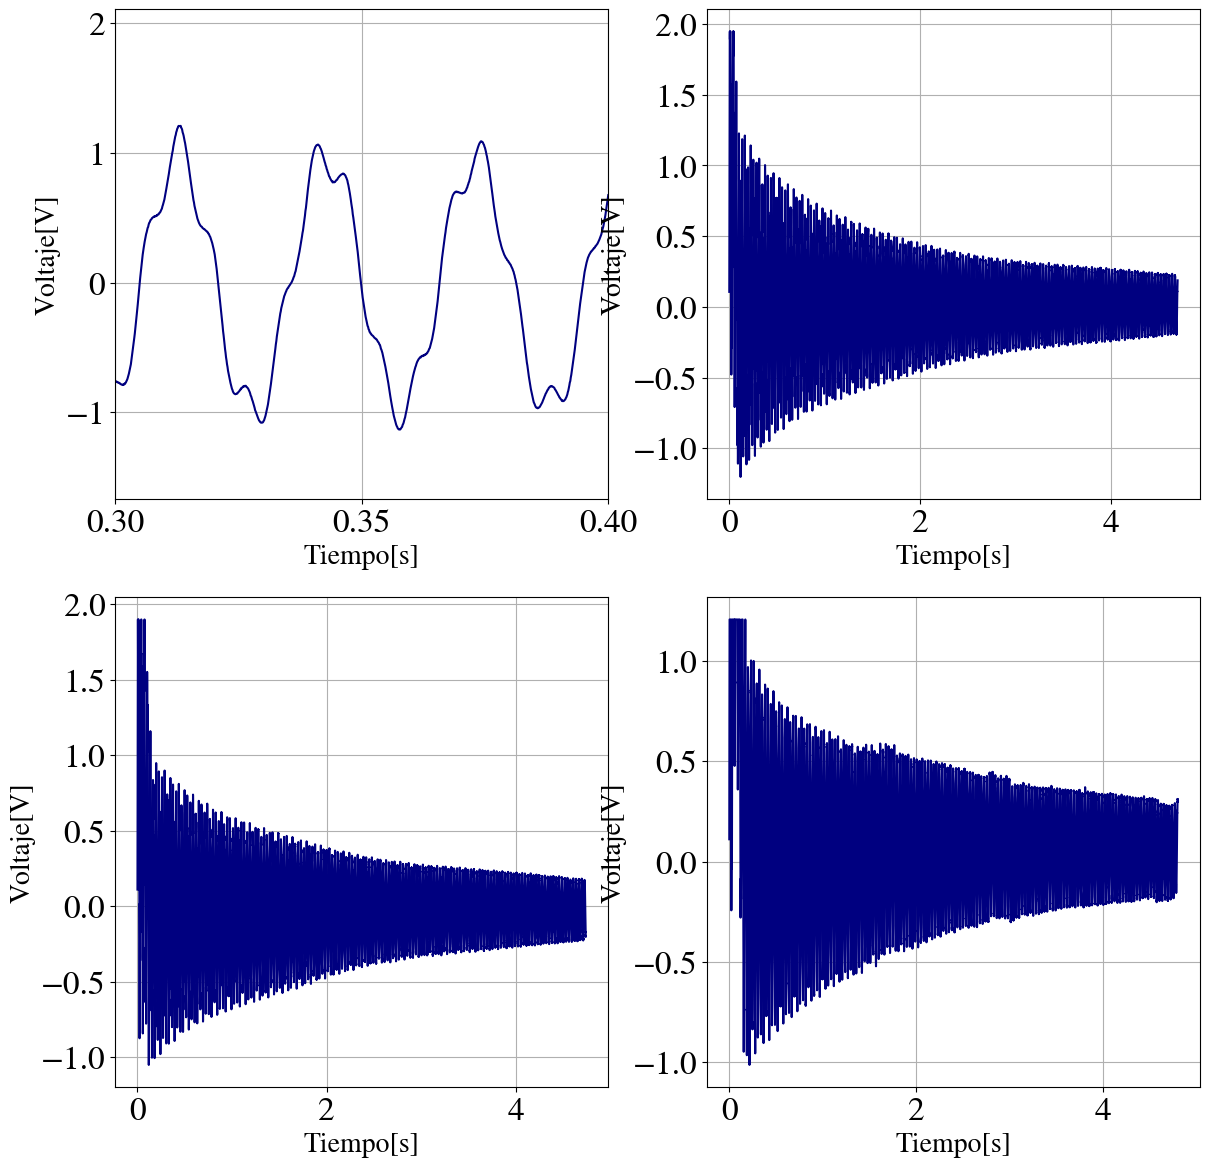

In [5]:
fig, axs = plt.subplots(2,2, figsize= (14,14))
axs[0,0].plot(tiempo[1], voltaje[1], color = 'navy', label = 'Señal')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].set_xlim(0.3,0.4)
#axs[0,0].legend()

axs[0,1].plot(tiempo[2], voltaje[2], color = 'navy', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
#axs[0,1].legend()

axs[1,0].plot(tiempo[3], voltaje[3], color = 'navy', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
#axs[1,0].legend()

axs[1,1].plot(tiempo[4], voltaje[4], color = 'navy', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
#axs[1,1].legend()

plt.show()

In [6]:
#defino variables con los datos
def frecuencia(k, L, E, I, rho):
    return ((k/L)**2)*np.sqrt(E*I/rho)

def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

rho_cobre = 8966
L_cobre = 243*10**(-3)
error_L_cobre = 1*10**(-3)
d_cobre = 5*10**(-3)
error_d_cobre = 0.05*10**(-3)
E_cobre = 130*(10)**9 #aprox, es para ver rangos

#frecuencias del acero en Hz
f1_cobre = frecuencia(k1_L, L_cobre, E_cobre, momento(d_cobre), dens_lineal(d_cobre, rho_cobre))/(2*np.pi)
f2_cobre = frecuencia(k2_L, L_cobre, E_cobre, momento(d_cobre), dens_lineal(d_cobre, rho_cobre))/(2*np.pi)
f3_cobre = frecuencia(k3_L, L_cobre, E_cobre, momento(d_cobre), dens_lineal(d_cobre, rho_cobre))/(2*np.pi)
f4_cobre = frecuencia(k4_L, L_cobre, E_cobre, momento(d_cobre), dens_lineal(d_cobre, rho_cobre))/(2*np.pi)

print(f' Los primeros modos se estiman encontrar en {f1_cobre:.2f}, {f2_cobre:.2f}, {f3_cobre:.2f}Hz')

 Los primeros modos se estiman encontrar en 45.11, 282.68, 791.51Hz


#FFT

In [7]:
#calculo las tranformadas

N = 50000
frec_muestreo = 10000

# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/5)

fft = []
picos = []
frec_picos = []

for i in range(5):
    fft1 = np.fft.fft(voltaje[i])
    fft2 = 2.0/N * np.abs(fft1)
    picos1, diccionario = find_peaks(fft2, threshold = 0.000005, distance = 400)
    fft.append(fft2)
    picos.append(picos1)
    frec_picos.append(frec[picos1][:3])
    '''
    plt.plot(frec[:N//2], fft2[:N//2])
    plt.plot(frec[picos1], fft2[picos1], marker = 'o', linestyle = '')
    plt.yscale('log')
    plt.xlim(-10,1000)
    plt.show()
    '''




In [8]:
140*(k2_L/k1_L)**2

877.3650382008493

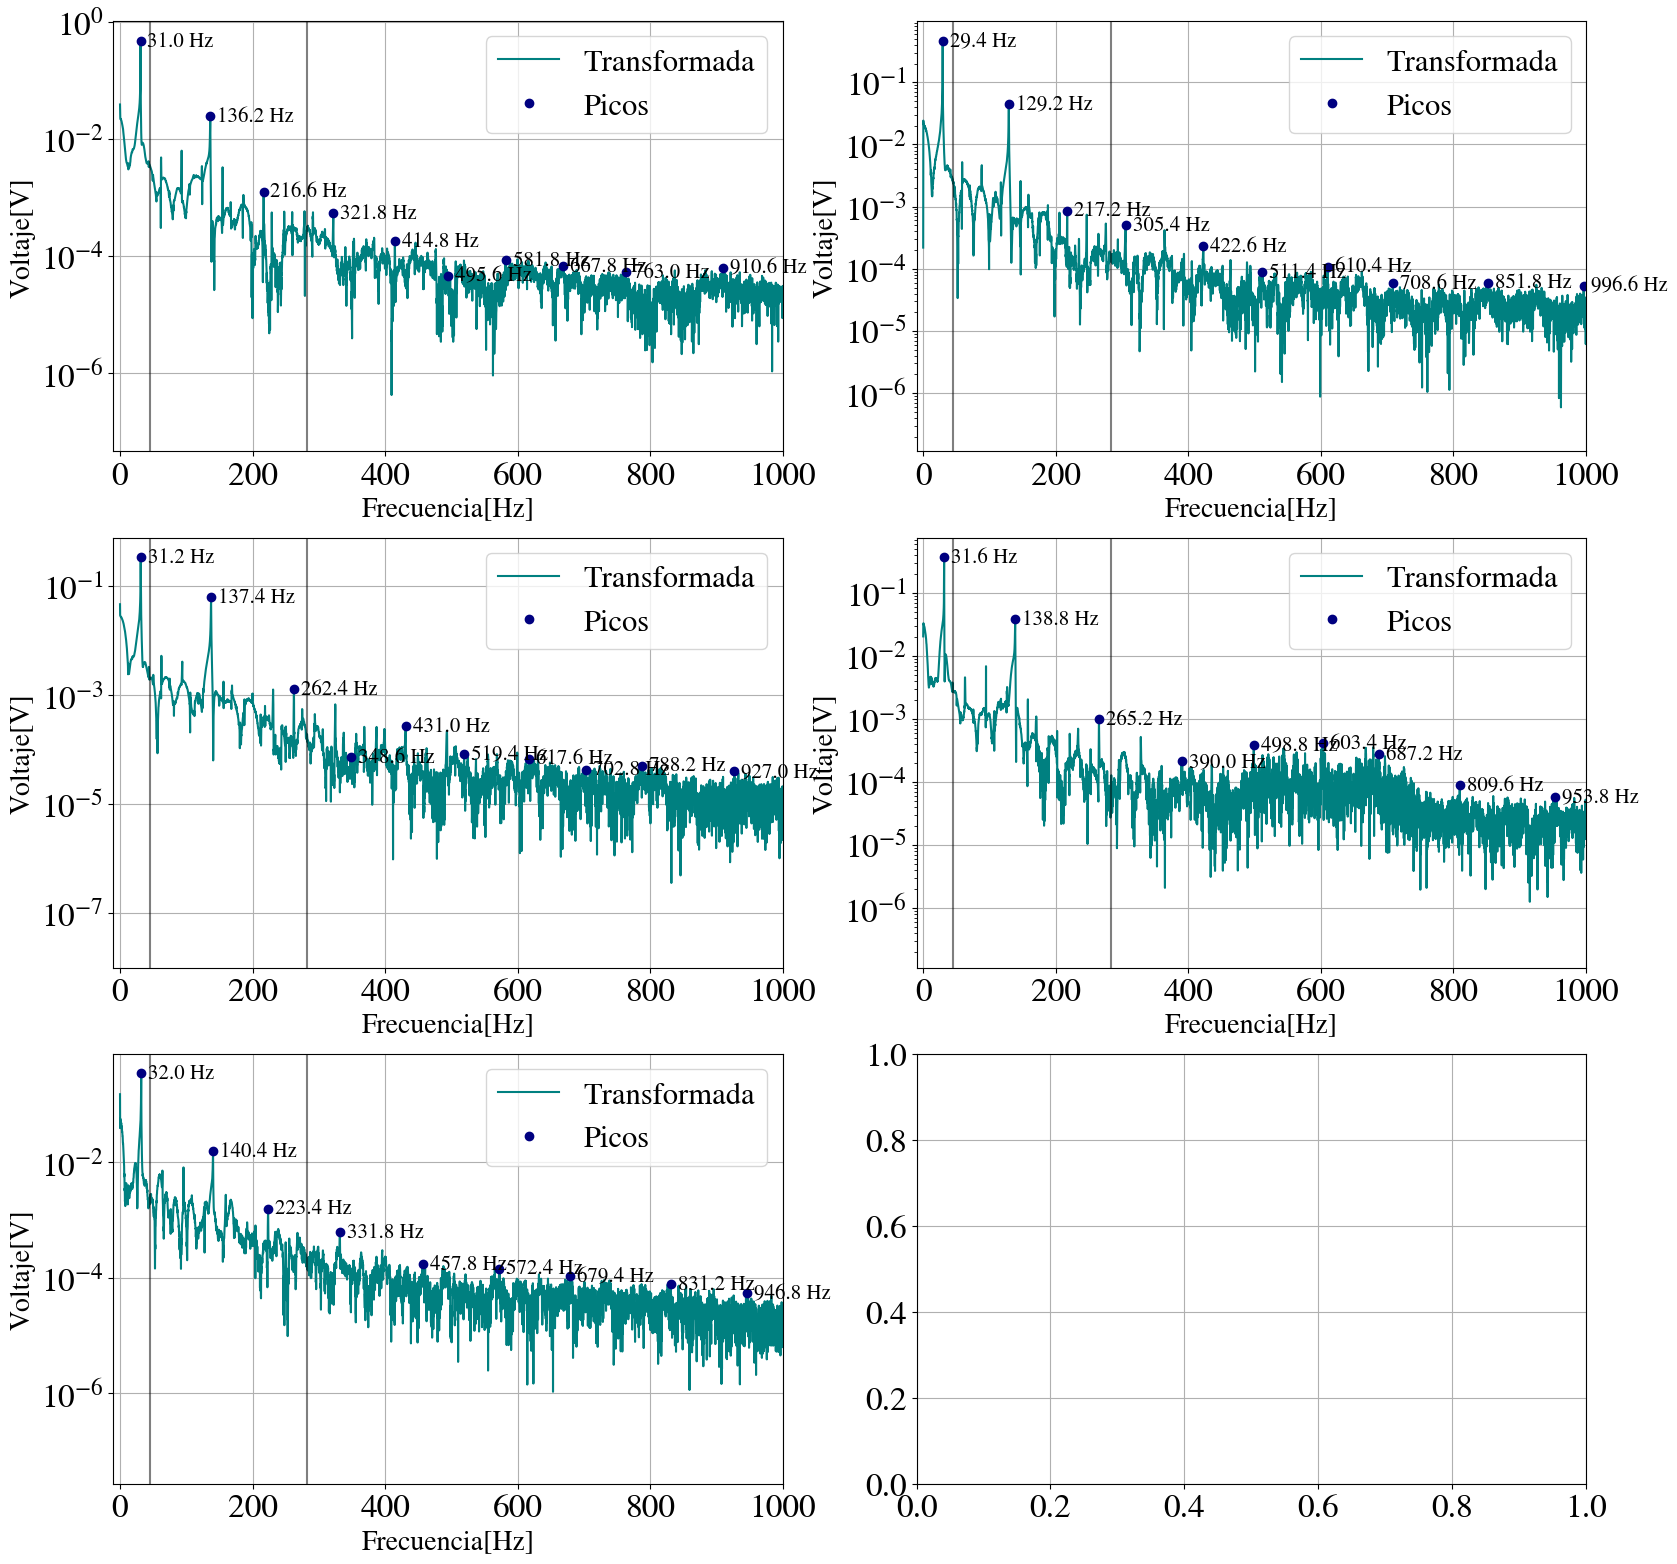

In [9]:
#Grafico todo junto

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(frec[:N//2], fft[0][:N//2], color = 'teal', label = 'Transformada')
axs[0,0].plot(frec[picos[0]], fft[0][picos[0]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,0].axvline(x= f1_cobre, color = 'black', alpha = 0.5)
axs[0,0].axvline(x= f2_cobre, color = 'black', alpha = 0.5)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Frecuencia[Hz]')
axs[0,0].set_xlim(-10,1000)
axs[0,0].set_yscale('log')
axs[0,0].legend()
for f, a in zip(frec[picos[0]], fft[0][picos[0]]):
    axs[0,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)


axs[0,1].plot(frec[:N//2], fft[1][:N//2], color = 'teal', label = 'Transformada')
axs[0,1].plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,1].axvline(x= f1_cobre, color = 'black', alpha = 0.5)
axs[0,1].axvline(x= f2_cobre, color = 'black', alpha = 0.5)
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Frecuencia[Hz]')
axs[0,1].set_xlim(-10,1000)
axs[0,1].set_yscale('log')
axs[0,1].legend()
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    axs[0,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,0].plot(frec[:N//2], fft[2][:N//2], color = 'teal', label = 'Transformada')
axs[1,0].plot(frec[picos[2]], fft[2][picos[2]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,0].axvline(x= f1_cobre, color = 'black', alpha = 0.5)
axs[1,0].axvline(x= f2_cobre, color = 'black', alpha = 0.5)
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Frecuencia[Hz]')
axs[1,0].set_xlim(-10,1000)
axs[1,0].set_yscale('log')
axs[1,0].legend()
for f, a in zip(frec[picos[2]], fft[2][picos[2]]):
    axs[1,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,1].plot(frec[:N//2], fft[3][:N//2], color = 'teal', label = 'Transformada')
axs[1,1].plot(frec[picos[3]], fft[3][picos[3]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,1].axvline(x= f1_cobre, color = 'black', alpha = 0.5)
axs[1,1].axvline(x= f2_cobre, color = 'black', alpha = 0.5)
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Frecuencia[Hz]')
axs[1,1].set_xlim(-10,1000)
axs[1,1].set_yscale('log')
axs[1,1].legend()
for f, a in zip(frec[picos[3]], fft[3][picos[3]]):
    axs[1,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[2,0].plot(frec[:N//2], fft[4][:N//2], color = 'teal', label = 'Transformada')
axs[2,0].plot(frec[picos[4]], fft[4][picos[4]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[2,0].axvline(x= f1_cobre, color = 'black', alpha = 0.5)
axs[2,0].axvline(x= f2_cobre, color = 'black', alpha = 0.5)
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Frecuencia[Hz]')
axs[2,0].set_xlim(-10,1000)
#axs[2,0].set_ylim(0,0.002)
axs[2,0].set_yscale('log')
axs[2,0].legend()
for f, a in zip(frec[picos[4]], fft[4][picos[4]]):
    axs[2,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

plt.show()

#Decaimiento

In [10]:
def exponencial(x,a,b,c,d):
    return a*np.exp((x-c)*b)+d

def exp_neg(x,a,b,c,d):
    return -a*np.exp(-(x-c)*b)+d

def chi2_red(x, y, f_ajuste, err_y, params):
  n_datos = y.size
  n_params = len(params)
  residuos = y - f_ajuste(x, *params)
  nu =  (n_datos - n_params) #Grados de Libertad
  chi2_val = sum((residuos / err_y) ** 2)
  chi2_red = chi2_val/nu
  p_valor = chi2.sf(chi2_val, df = nu)
  return chi2_val, chi2_red, nu, p_valor

-0.6820448681290605


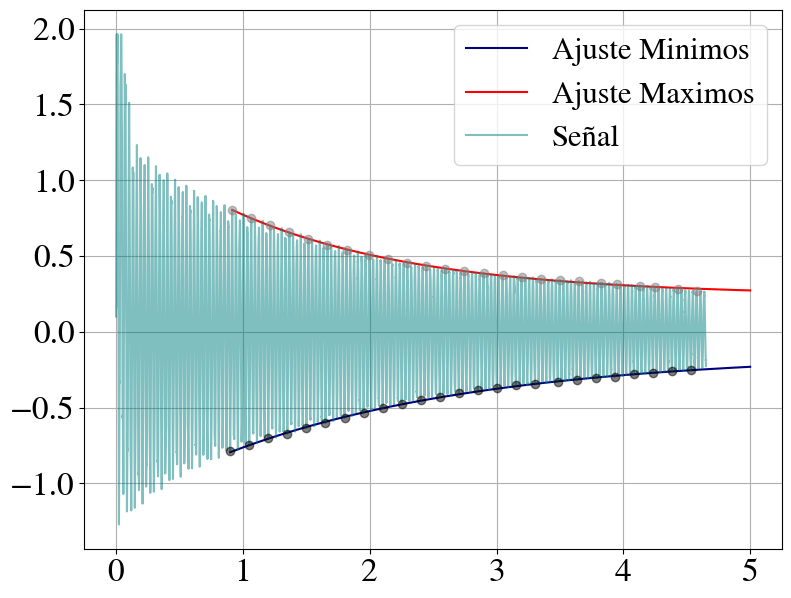

0


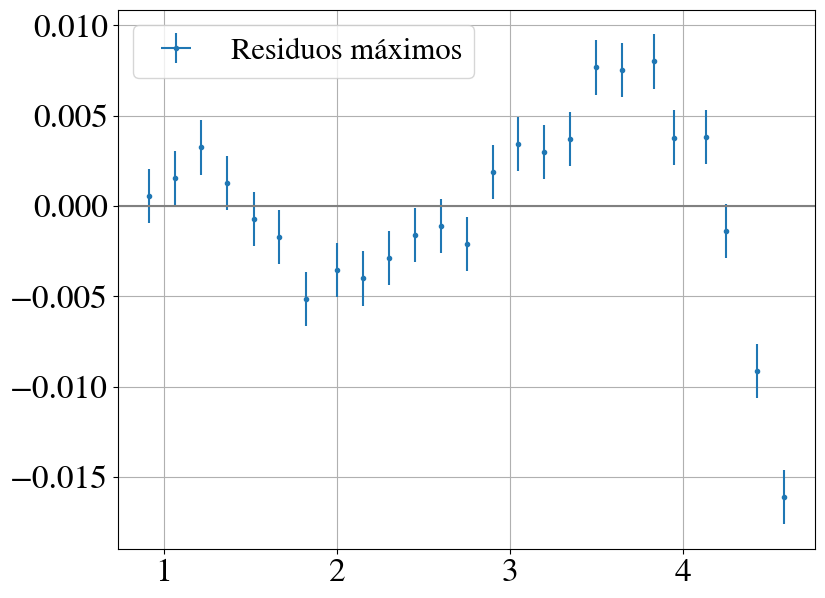

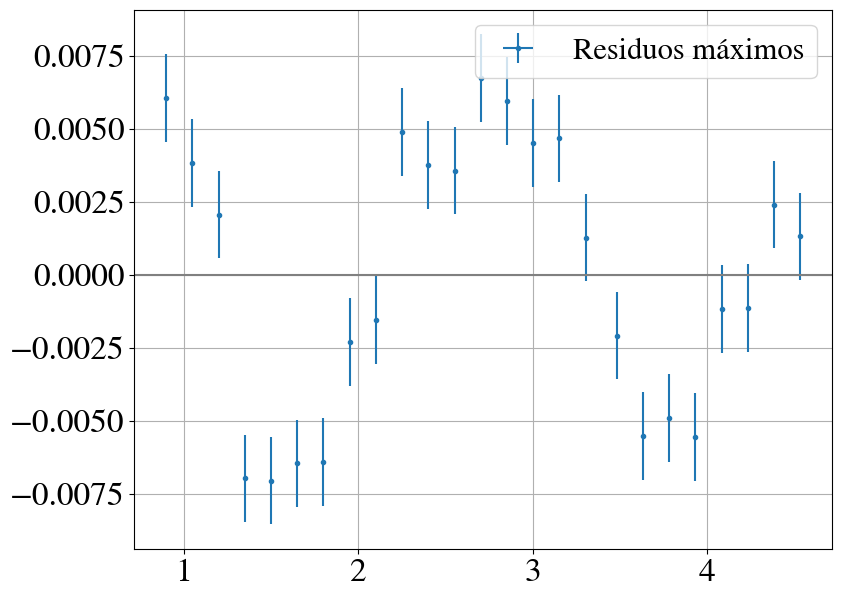

-0.7694651252049778


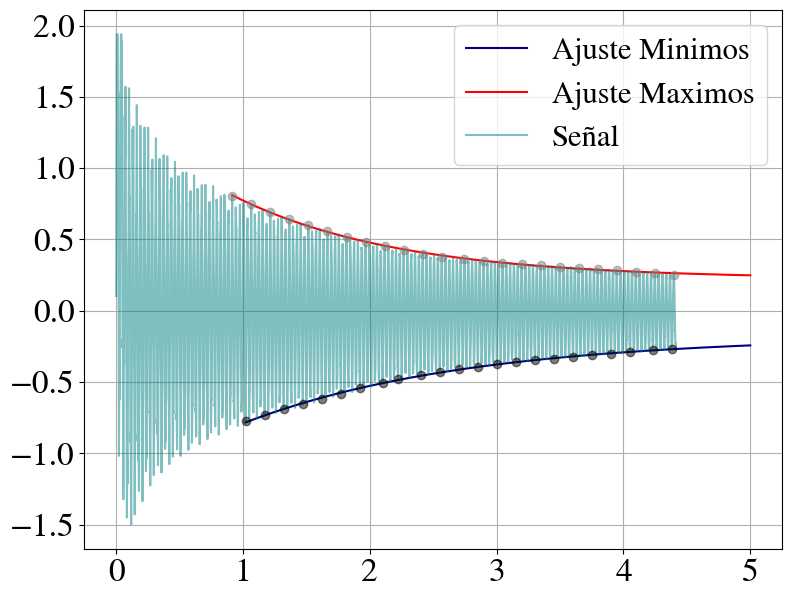

1


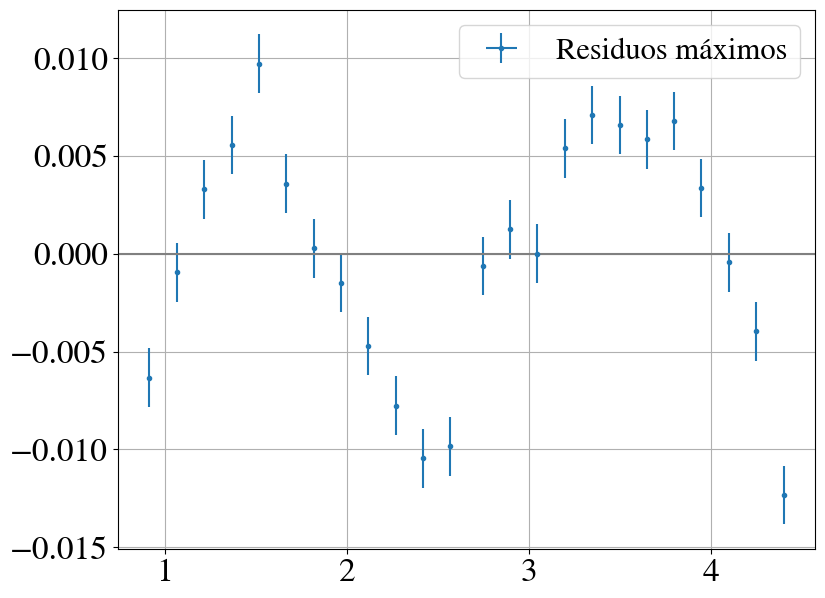

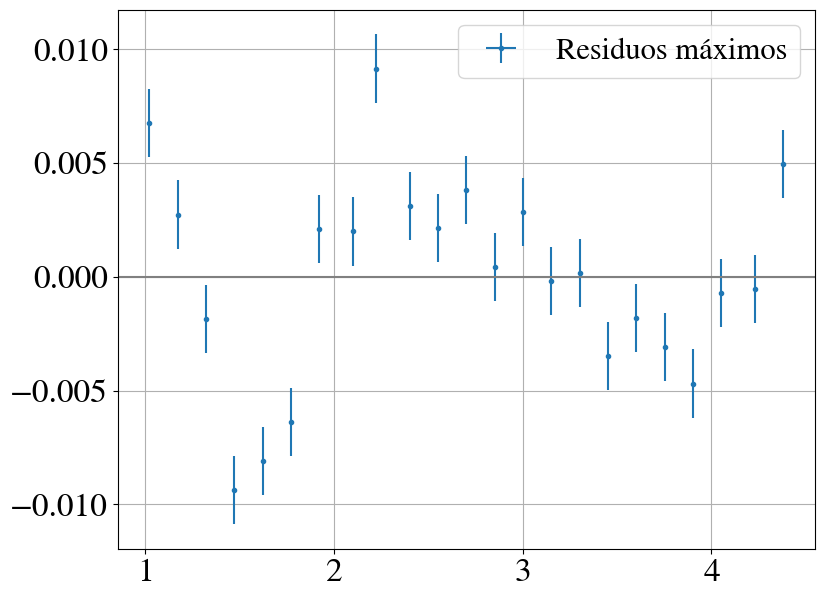

-0.7111776891376325


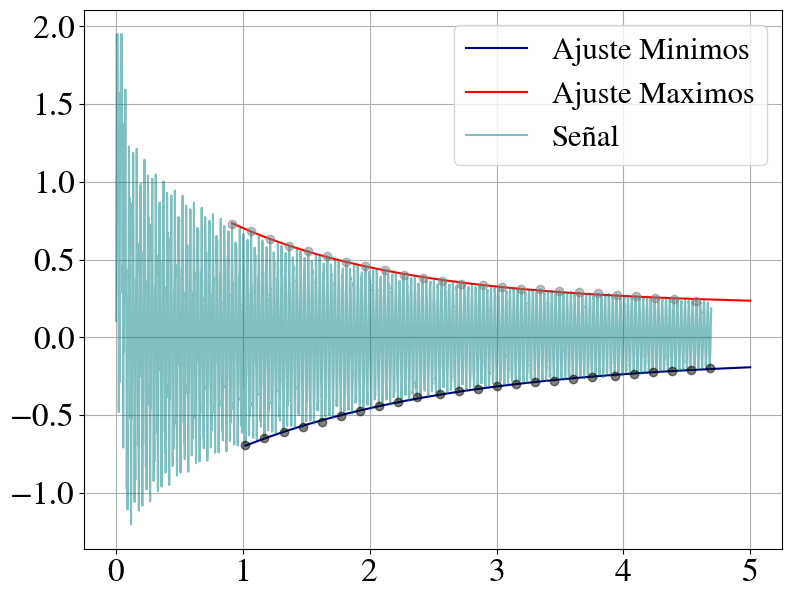

2


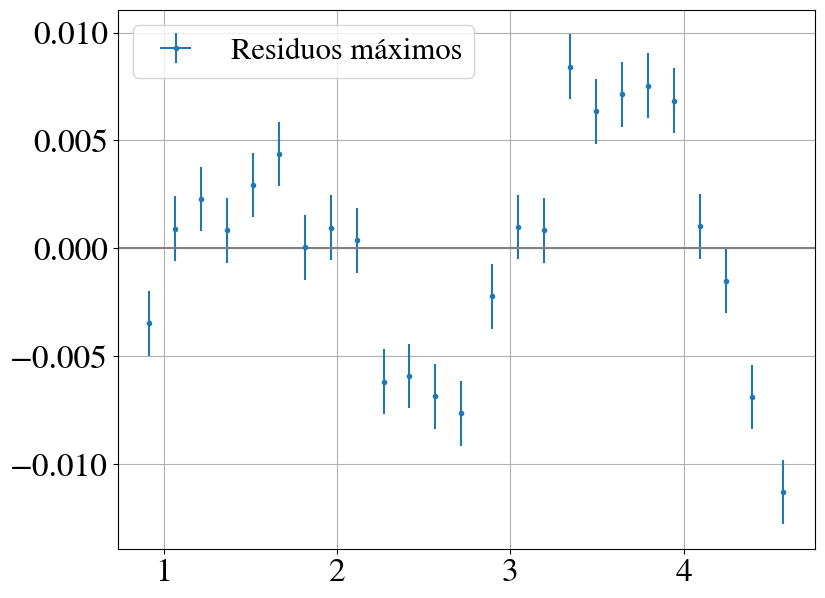

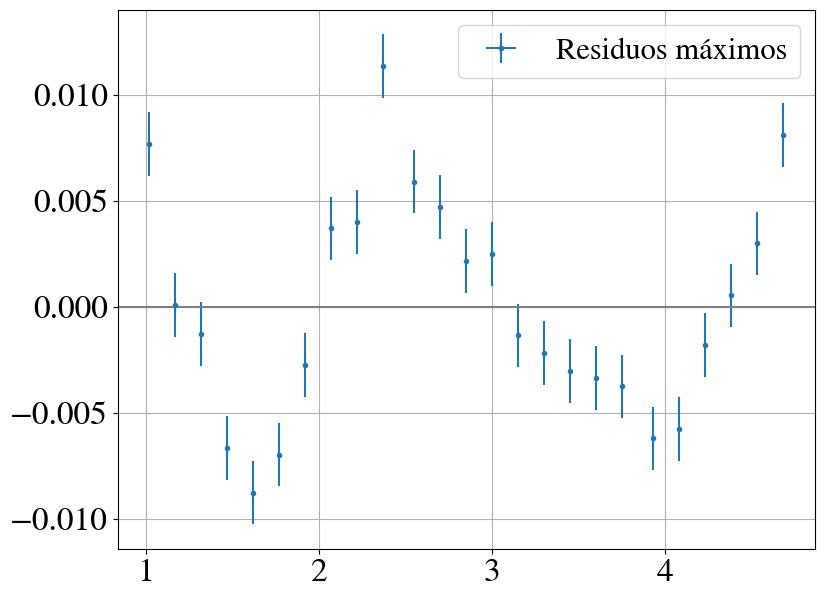

-0.560176319919855


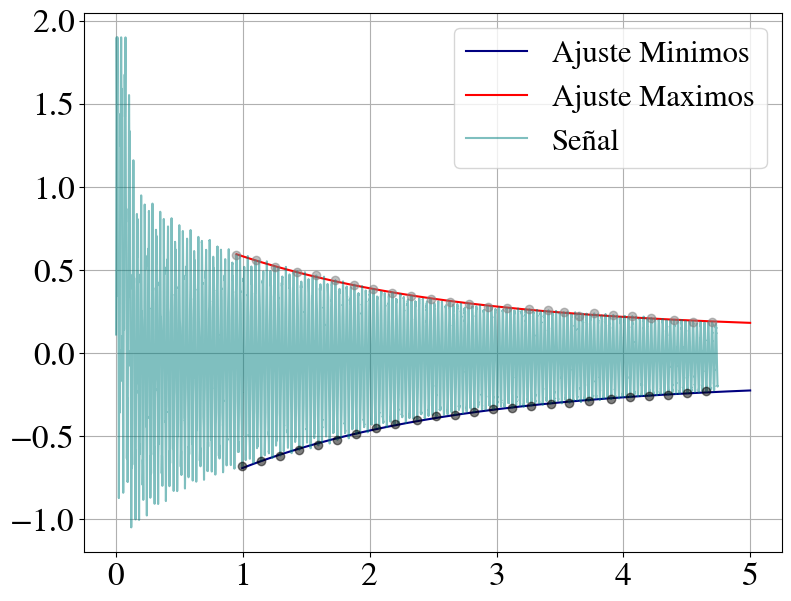

3


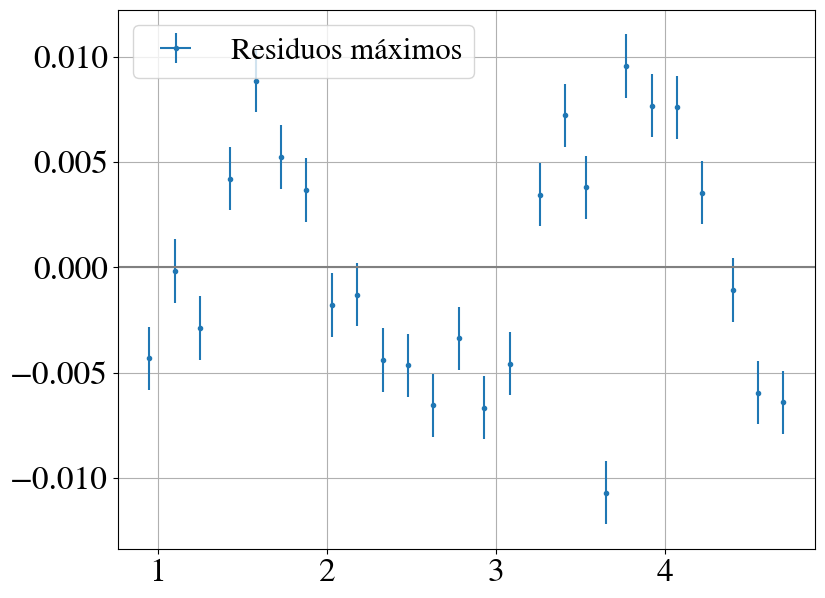

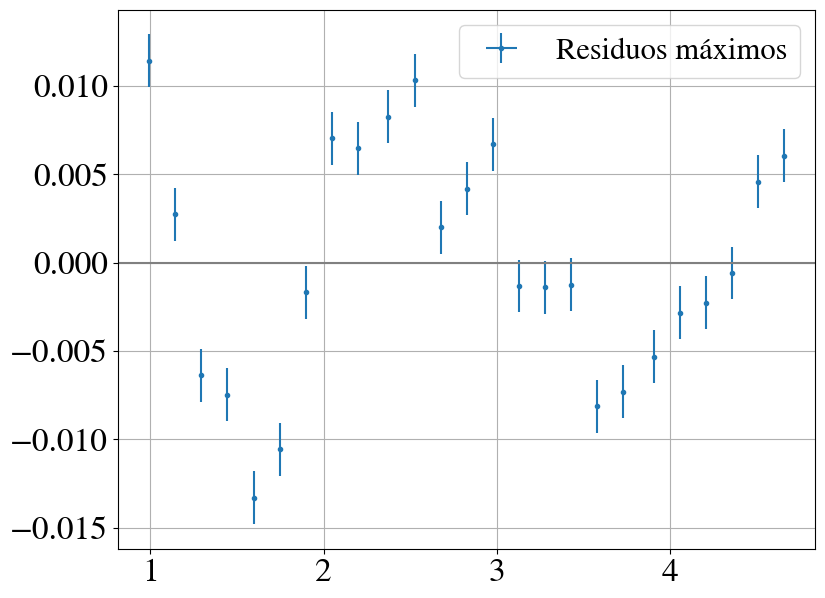

-0.32699422774875914


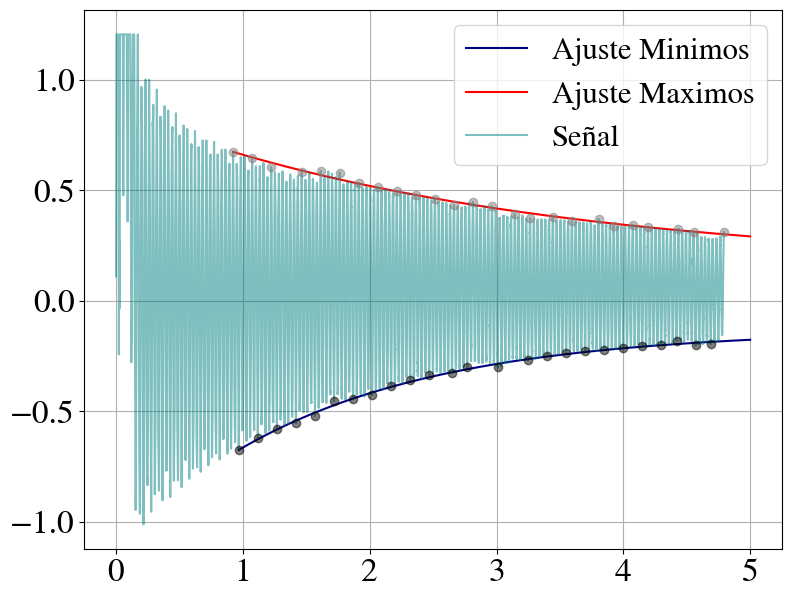

4


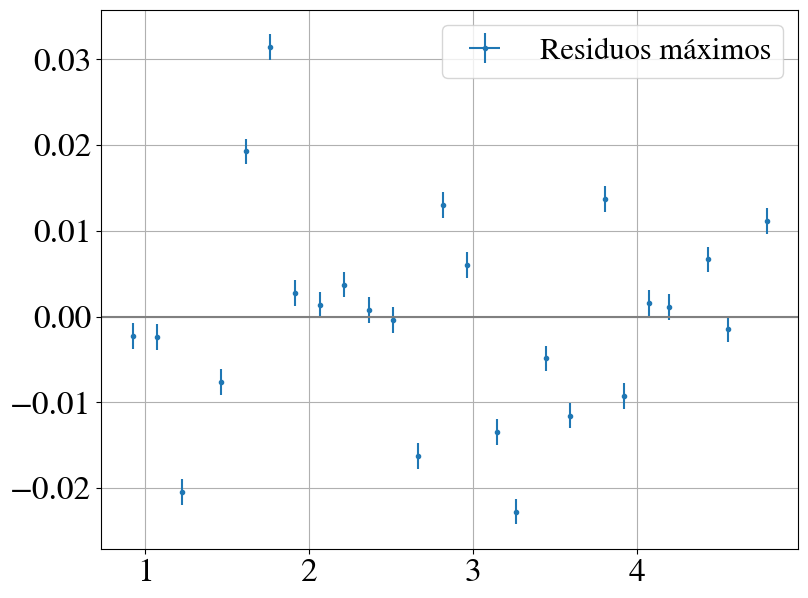

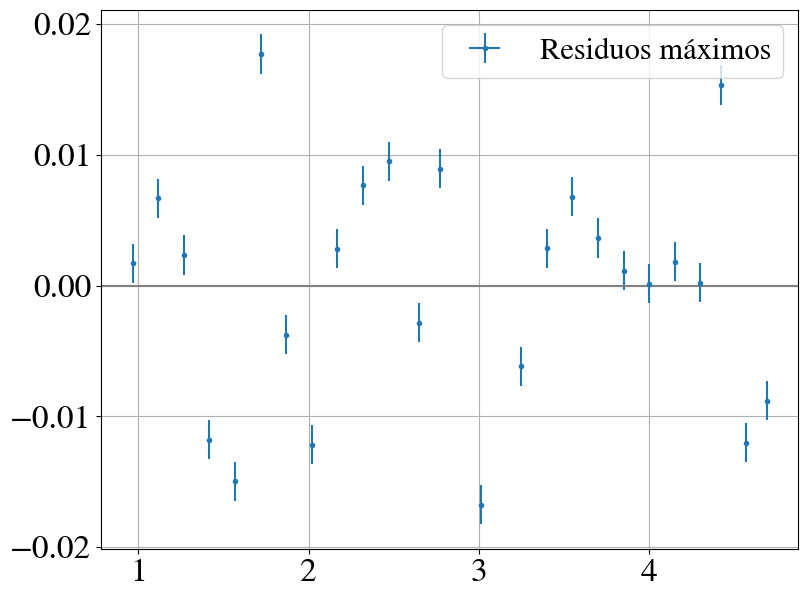

In [11]:
maximos = []
minimos = []
t_maximos = []
t_minimos = []

coef_min = []
ampl_min = []
t_ini_min = []
ordenada_min = []


coef_max = []
ampl_max = []
t_ini_max = []
ordenada_max = []

err_coef_max = []
err_coef_min = []


chi2_red_min = []
chi2_red_max = []
p_valor_max = []
p_valor_min = []

for i in range(5):

    #maximos
    picos_voltaje, diccionario_voltaje = find_peaks(voltaje[i], height = 0, distance = 1200)

    peak_voltage_values = voltaje[i].iloc[picos_voltaje[6:]]
    t_max = tiempo[i].iloc[picos_voltaje[6:]]

    maximos.append(peak_voltage_values)
    suave_max = np.linspace(t_max.iloc[0], 5, 5000)

    max_err = np.array([0.0015]*len(peak_voltage_values))
    t_max_err = np.array([5*10**(-9)]*len(peak_voltage_values))

    #minimos
    picos_voltaje_min, diccionario_voltaje_min = find_peaks(-voltaje[i], height = -0.1, distance = 1200)

    min_volt = voltaje[i].iloc[picos_voltaje_min[6:]]
    t_min = tiempo[i].iloc[picos_voltaje_min[6:]]

    minimos.append(min_volt)
    suave_min = np.linspace(t_min.iloc[0], 5, 5000)

    min_err = np.array([0.0015]*len(min_volt))
    t_min_err = np.array([5*10**(-9)]*len(min_volt))


    #ajustes

    #if i ==0:
    #    p_ini_max = [0.2, -1, t_max.iloc[0], 0]
    #    p_ini_min = [0.1, 1, t_min.iloc[0], 0]

    if i ==4:
        p_ini_max = [1, -0.7, t_max.iloc[0], 0]
        p_ini_min = [-min(min_volt), 1, t_min.iloc[0], 0]

    elif i == 0:
        p_ini_max = [0.5, -0.2, t_max.iloc[0], 0]
        p_ini_min = [-min(min_volt), 1, t_min.iloc[0], 0]

    else:
        p_ini_max = [max(peak_voltage_values), -1, t_max.iloc[0], 0]
        p_ini_min = [-min(min_volt), 1, t_min.iloc[0], 0]

    popt, pcov = curve_fit(exponencial, t_max, peak_voltage_values,  p0 = p_ini_max, sigma = max_err, absolute_sigma = True)
    amplitud, decaimiento, t0, offset = popt
    amplitud_err, decaimiento_err, t0_err, offset_err = np.sqrt(np.diag(pcov))

    print(decaimiento)

    popt_min, pcov_min = curve_fit(exp_neg, t_min, min_volt, p0 = p_ini_min, sigma = min_err, absolute_sigma = True)
    amplitud_min, decaimiento_min, t0_min, offset_min = popt_min
    amplitud_min_err, decaimiento_min_err, t0_min_err, offset_min_err = np.sqrt(np.diag(pcov_min))

    #ploteo
    plt.plot(suave_min, exp_neg(suave_min,amplitud_min, decaimiento_min, t0_min, offset_min), label = 'Ajuste Minimos', color = 'navy')
    plt.plot(suave_max, exponencial(suave_max,amplitud, decaimiento, t0, offset), label = 'Ajuste Maximos', color = 'red')
    plt.plot(tiempo[i], voltaje[i], label = 'Señal', color = 'teal', alpha = 0.5)
    plt.plot(t_min,min_volt, marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
    plt.plot(t_max,peak_voltage_values, marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
    plt.legend()
    plt.show()


    #appendeo los parámetros
    coef_min.append(decaimiento_min)
    ampl_min.append(amplitud_min)
    err_coef_min.append(decaimiento_min_err)
    t_ini_min.append(t0_min)
    ordenada_min.append(offset_min)
    t_minimos.append(t_min)

    coef_max.append(decaimiento)
    ampl_max.append(amplitud)
    err_coef_max.append(decaimiento_err)
    t_ini_max.append(t0)
    ordenada_max.append(offset)
    t_maximos.append(t_max)


    #calculo parámetros de bondad y appendeo
    chi_min, chi_red_min, gl_min, p_value_min = chi2_red(t_min, min_volt, exp_neg, min_err, popt_min)
    chi_max, chi_red_max, gl_max, p_value_max = chi2_red(t_max, peak_voltage_values, exponencial, max_err, popt)

    chi2_red_min.append(chi_red_min)
    print(i)
    chi2_red_max.append(chi_red_max)

    p_valor_min.append(p_value_min)
    p_valor_max.append(p_value_max)

    #grafico de residuos

    residuos_max = peak_voltage_values-exponencial(t_max, *popt)
    residuos_min = min_volt - exp_neg(t_min, *popt_min)

    plt.errorbar(t_max, residuos_max, label = 'Residuos máximos', yerr = max_err, xerr = t_max_err, fmt='.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()

    plt.errorbar(t_min, residuos_min, label = 'Residuos máximos', yerr = min_err, xerr = t_min_err, fmt = '.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()

In [12]:
#Parámetros de bondad


for i in range(5):
    print(f'Para la medición {i} de los máximos se obtuvo un chi cuadrado reducido de {chi2_red_max[i]}')
    print(f'Asociado a pvalue de  {p_valor_max[i]}')
    print(f'Para la medición {i} de los mínimos se obtuvo un chi cuadrado reducido de {chi2_red_min[i]}')
    print(f'Asociado a pvalue de  {p_valor_min[i]}')
    print(f'--------------------------------------------------------------------------')


Para la medición 0 de los máximos se obtuvo un chi cuadrado reducido de 14.44851092939442
Asociado a pvalue de  6.406551919797227e-52
Para la medición 0 de los mínimos se obtuvo un chi cuadrado reducido de 11.007060045870768
Asociado a pvalue de  2.4351416211911377e-37
--------------------------------------------------------------------------
Para la medición 1 de los máximos se obtuvo un chi cuadrado reducido de 19.239597966646656
Asociado a pvalue de  2.8985439143090115e-69
Para la medición 1 de los mínimos se obtuvo un chi cuadrado reducido de 10.578462446643112
Asociado a pvalue de  2.162662003367069e-32
--------------------------------------------------------------------------
Para la medición 2 de los máximos se obtuvo un chi cuadrado reducido de 14.301838892107153
Asociado a pvalue de  2.7143078352643715e-51
Para la medición 2 de los mínimos se obtuvo un chi cuadrado reducido de 13.862238952980485
Asociado a pvalue de  2.0435562178753536e-49
-------------------------------------

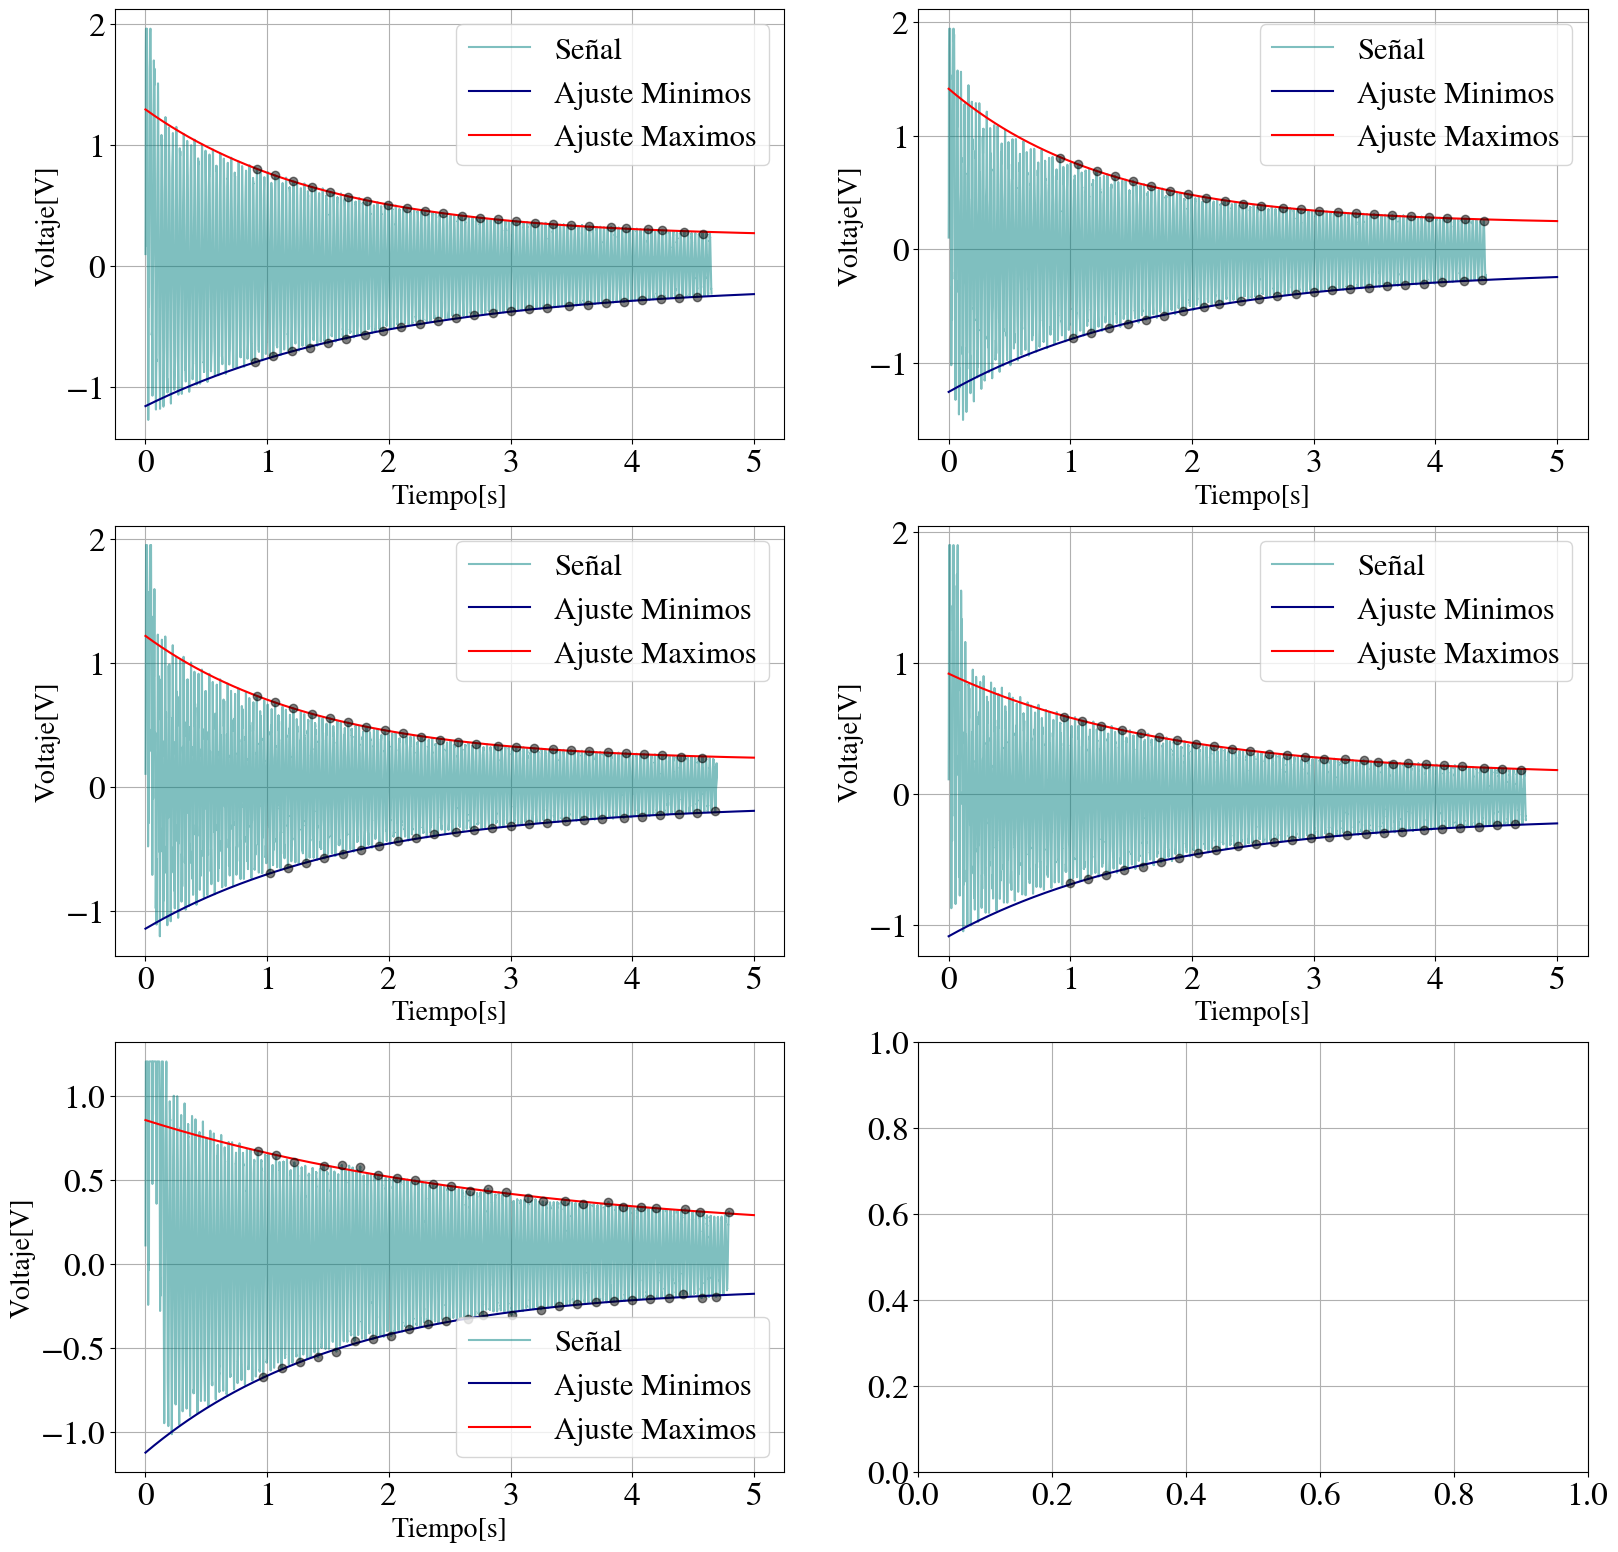

In [13]:
#Grafico todo junto
suave = np.linspace(0,5,1000)

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,0].plot(suave, exp_neg(suave,ampl_min[0], coef_min[0], t_ini_min[0], ordenada_min[0]), label = 'Ajuste Minimos', color = 'navy')
axs[0,0].plot(suave, exponencial(suave,ampl_max[0], coef_max[0], t_ini_max[0], ordenada_max[0]), label = 'Ajuste Maximos', color = 'red')
axs[0,0].plot(t_minimos[0], minimos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].plot(t_maximos[0], maximos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()


axs[0,1].plot(tiempo[1], voltaje[1], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,1].plot(suave, exp_neg(suave,ampl_min[1], coef_min[1], t_ini_min[1], ordenada_min[1]), label = 'Ajuste Minimos', color = 'navy')
axs[0,1].plot(suave, exponencial(suave,ampl_max[1], coef_max[1], t_ini_max[1], ordenada_max[1]), label = 'Ajuste Maximos', color = 'red')
axs[0,1].plot(t_minimos[1], minimos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].plot(t_maximos[1], maximos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,0].plot(suave, exp_neg(suave,ampl_min[2], coef_min[2], t_ini_min[2], ordenada_min[2]), label = 'Ajuste Minimos', color = 'navy')
axs[1,0].plot(suave, exponencial(suave,ampl_max[2], coef_max[2], t_ini_max[2], ordenada_max[2]), label = 'Ajuste Maximos', color = 'red')
axs[1,0].plot(t_minimos[2], minimos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].plot(t_maximos[2], maximos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,1].plot(suave, exp_neg(suave,ampl_min[3], coef_min[3], t_ini_min[3], ordenada_min[3]), label = 'Ajuste Minimos', color = 'navy')
axs[1,1].plot(suave, exponencial(suave,ampl_max[3], coef_max[3], t_ini_max[3], ordenada_max[3]), label = 'Ajuste Maximos', color = 'red')
axs[1,1].plot(t_minimos[3], minimos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].plot(t_maximos[3], maximos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[4], voltaje[4], color = 'teal', label = 'Señal', alpha = 0.5)
axs[2,0].plot(suave, exp_neg(suave,ampl_min[4], coef_min[4], t_ini_min[4], ordenada_min[4]), label = 'Ajuste Minimos', color = 'navy')
axs[2,0].plot(suave, exponencial(suave,ampl_max[4], coef_max[4], t_ini_max[4], ordenada_max[4]), label = 'Ajuste Maximos', color = 'red')
axs[2,0].plot(t_minimos[4], minimos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].plot(t_maximos[4], maximos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()

plt.show()

#Calculo del Modulo de Young

In [14]:
alfa_max = np.array(coef_max)
err_alfa_max = np.array(err_coef_max)
alfa_min = -np.array(coef_min)
err_alfa_min = np.array(err_coef_min)


frecuencias_fundamental = np.array([sub[0] for sub in frec_picos])
frecuencias_seg = np.array([sub[1] for sub in frec_picos])
frecuencias_ter = np.array([sub[2] for sub in frec_picos])
error_frec = np.array([1/5]*5)


In [15]:
def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

#defino variables con los datos


rho_cobre = 8960
L_cobre = 243*10**(-3)
error_L_cobre = 1*10**(-3)
d_cobre = 5*10**(-3)
error_d_cobre = 0.05*10**(-3)
f1_teorico = 45
err_f = 1/5


def modulo_young(f, I, rho, k, alfa, L):
    E = ((f*2*np.pi)**2 + alfa**2)*((rho*(L**4))/(I*(k**4)))
    return E
def error_modulo_young(e, f, I, rho, k, alfa, L, f_err, I_err, rho_err, alfa_err, L_err):
    return np.sqrt((e**2)*((rho_err/rho)**2 + (4*L_err/L)**2 + (I_err/I)**2) + ((rho*(L**4)/(I*(k**4)))**2)*((4*np.pi*f*f_err)**2 + (2*alfa_err*alfa)**2))

def error_momento(I,d, err_d):
    return 4*I*err_d/d

def error_rho(rho, d, err_d):
    return 2*rho*err_d/d
E_teorico = modulo_young(f1_teorico, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,decaimiento, L_cobre)

err_I= error_momento(momento(d_cobre), d_cobre, error_d_cobre)
err_rho = error_rho(dens_lineal(d_cobre, rho_cobre), d_cobre, error_d_cobre)

E_max = []
E_min = []
E_max_err = []
E_min_err = []

E_max_seg = []
E_max_ter = []

E_max_resta = []
E_max_suma = []

for k in range(len(frecuencias_fundamental)):
    E_max_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_max[k], L_cobre)
    E_min_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_min[k], L_cobre)

    E_max_resta_k = modulo_young((frecuencias_seg[k]-frecuencias_ter[k])/2, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)
    E_max_suma_k = modulo_young((frecuencias_seg[k]+frecuencias_ter[k])/2, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)

    E_max_k_2 = modulo_young(frecuencias_seg[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)
    E_max_k_3 = modulo_young(frecuencias_ter[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k2_L,alfa_max[k], L_cobre)


    E_max_k_err = error_modulo_young(E_max_k, frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_max[k], L_cobre,err_f, err_I, err_rho, err_alfa_max[k], error_L_cobre)
    E_min_k_err = error_modulo_young(E_min_k, frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_min[k], L_cobre,err_f, err_I, err_rho, err_alfa_min[k], error_L_cobre)

    E_max.append(E_max_k)
    E_min.append(E_min_k)
    E_max_err.append(E_max_k_err)
    E_min_err.append(E_min_k_err)
    E_max_seg.append(E_max_k_2)
    E_max_ter.append(E_max_k_3)
    E_max_resta.append(E_max_resta_k)
    E_max_suma.append(E_max_suma_k)


E_max = np.array(E_max)
E_min = np.array(E_min)



print(f'el valor esperado para el modulo de young es {E_teorico*10**(-9):.2f}GPa')

for i in range(5):
    print(f'--------------------------------------------')
    print(f'El valor obtenido para el {i} con máximos es  ({E_max[i]*10**(-9):.3f}+- {E_max_err[i]*10**(-9):.3f})GPa')
    print(f'El valor obtenido para el {i} con mínimos es  ({E_min[i]*10**(-9):.3f}+- {E_min_err[i]*10**(-9):.3f})GPa')
    print(f'--------------------------------------------')


el valor esperado para el modulo de young es 129.30GPa
--------------------------------------------
El valor obtenido para el 0 con máximos es  (61.362+- 2.927)GPa
El valor obtenido para el 0 con mínimos es  (61.362+- 2.927)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 1 con máximos es  (55.192+- 2.633)GPa
El valor obtenido para el 1 con mínimos es  (55.191+- 2.633)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 2 con máximos es  (62.156+- 2.965)GPa
El valor obtenido para el 2 con mínimos es  (62.156+- 2.965)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 3 con máximos es  (63.760+- 3.041)GPa
El valor obtenido para el 3 con mínimos es  (63.760+- 3.041)GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 4 

In [20]:
E = np.concatenate((E_max, E_min))*10**(-9)
print(E)

[61.36208196 55.1916744  62.15646076 63.76010094 65.38414952 61.36172112
 55.19122994 62.15617058 63.76011299 65.38459844]


In [17]:
for i in range(5):
    print(f'--------------------------------------------')
    print(f'El valor obtenido para el {i} con el segundo pico es  {E_max_seg[i]*10**(-9):.3f}')
    print(f'El valor obtenido para el {i} con el tercer pico es  {E_max_ter[i]*10**(-9):.3f}GPa')
    print(f'El valor obtenido para el {i} con la resta del tercero y segundo es  {E_max_resta[i]*10**(-9):.3f}GPa')
    print(f'El valor obtenido para el {i} con la suma del tercero y el segundo  {E_max_suma[i]*10**(-9):.3f}GPa')
    print(f'--------------------------------------------')

--------------------------------------------
El valor obtenido para el 0 con el segundo pico es  30.159
El valor obtenido para el 0 con el tercer pico es  76.275GPa
El valor obtenido para el 0 con la resta del tercero y segundo es  2.627GPa
El valor obtenido para el 0 con la suma del tercero y el segundo  50.590GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 1 con el segundo pico es  27.139
El valor obtenido para el 1 con el tercer pico es  76.698GPa
El valor obtenido para el 1 con la resta del tercero y segundo es  3.148GPa
El valor obtenido para el 1 con la suma del tercero y el segundo  48.771GPa
--------------------------------------------
--------------------------------------------
El valor obtenido para el 2 con el segundo pico es  30.693
El valor obtenido para el 2 con el tercer pico es  111.942GPa
El valor obtenido para el 2 con la resta del tercero y segundo es  6.351GPa
El valor obtenido para el 2 con la

In [18]:
frecuencias_ter

array([216.6, 217.2, 262.4, 265.2, 223.4])

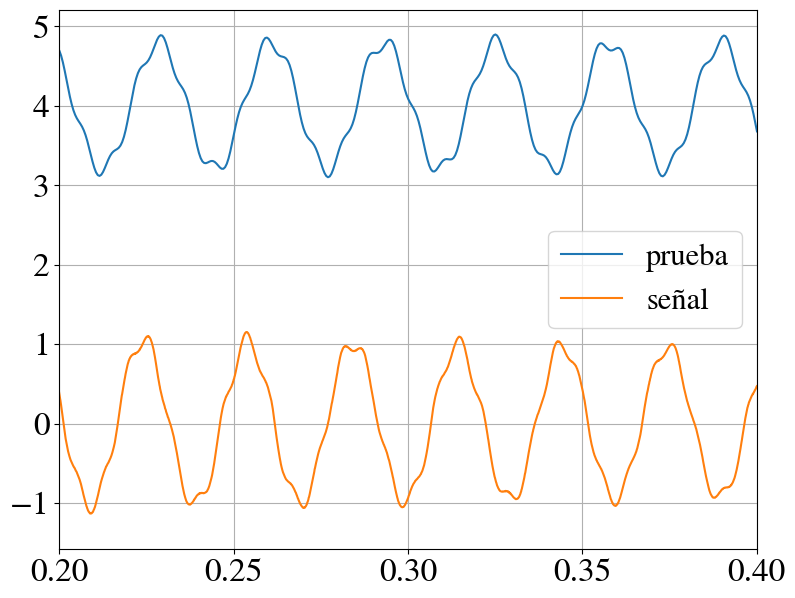

In [19]:
x = np.linspace(0,5, 10000)

#f = 10*np.sin((frecuencias_seg[0]-frecuencias_ter[0])*np.pi*x)*np.sin((frecuencias_seg[0]+frecuencias_ter[0])*np.pi*x)+20 + np.sin(frecuencias_fundamental[0]*2*np.pi*x)
#f = 10*np.sin((frecuencias_seg[0]-frecuencias_fundamental[0])*np.pi*x)*np.sin((frecuencias_seg[0]+frecuencias_fundamental[0])*np.pi*x)+20 #+ np.sin(frecuencias_fundamental[0]*2*np.pi*x)
f = 0.1*np.sin(frecuencias_seg[0]*2*np.pi*x)+0.8*np.sin(frecuencias_fundamental[0]*2*np.pi*x+np.pi/3)+4

plt.plot(x,f, label = 'prueba')
#plt.plot(x, f_2, label = 'prueba suma')
plt.plot(tiempo[0], voltaje[0], label = 'señal')
plt.legend()
plt.xlim(0.2,0.4)
plt.show()